In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
df = pd.read_csv('movie_data.csv') 

In [4]:
df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [6]:
df.isnull().sum()

id                            0
title                        13
vote_average                  0
vote_count                    0
status                        0
release_date             214713
revenue                       0
runtime                       0
adult                         0
backdrop_path            886916
budget                        0
homepage                1074509
imdb_id                  583117
original_language             0
original_title               13
overview                 251993
popularity                    0
poster_path              391087
tagline                 1032618
genres                   493259
production_companies     665971
production_countries     545050
spoken_languages         524220
keywords                 883245
dtype: int64

In [7]:
missing_percentage = df.isnull().sum() / len(df) * 100
print("Missing Values Percentage:\n", missing_percentage)


Missing Values Percentage:
 id                       0.000000
title                    0.001083
vote_average             0.000000
vote_count               0.000000
status                   0.000000
release_date            17.879966
revenue                  0.000000
runtime                  0.000000
adult                    0.000000
backdrop_path           73.856859
budget                   0.000000
homepage                89.478440
imdb_id                 48.558364
original_language        0.000000
original_title           0.001083
overview                20.984413
popularity               0.000000
poster_path             32.567298
tagline                 85.990017
genres                  41.075548
production_companies    55.457931
production_countries    45.388381
spoken_languages        43.653788
keywords                73.551161
dtype: float64


In [8]:
df = df.dropna(thresh=len(df) * 0.5, axis=1)

In [9]:
df.fillna(df.median(numeric_only=True), inplace=True)  # Fill numeric columns with median
df.fillna("Unknown", inplace=True)  # Fill categorical columns with 'Unknown'


C:\Users\sumit\AppData\Local\Temp\ipykernel_15048\66295322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.median(numeric_only=True), inplace=True)  # Fill numeric columns with median
C:\Users\sumit\AppData\Local\Temp\ipykernel_15048\66295322.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna("Unknown", inplace=True)  # Fill categorical columns with 'Unknown'


In [10]:
features = ['budget', 'popularity', 'runtime', 'vote_average', 'vote_count']
target = 'revenue'

In [11]:
available_features = [col for col in features if col in df.columns]

X = df[available_features]
y = df[target]


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [15]:
y_pred = model.predict(X_test)

In [16]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [17]:
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

MAE: 541688.5297005374
RMSE: 15725692.692109419
R² Score: 0.33962575232778913


C:\Users\sumit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


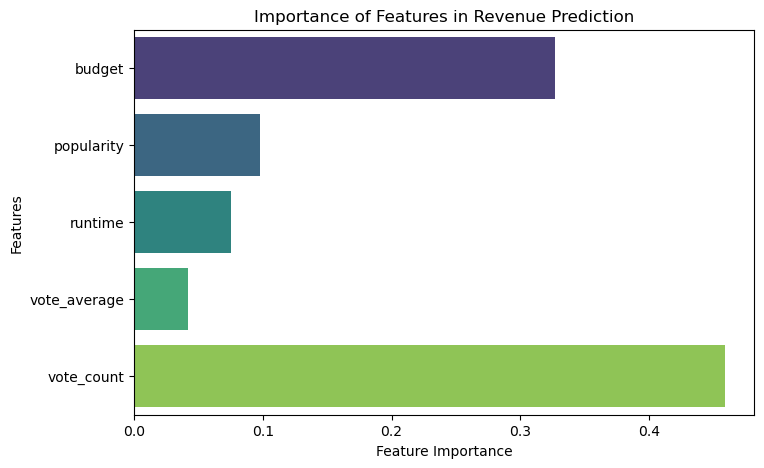

In [18]:
plt.figure(figsize=(8,5))
sns.barplot(x=model.feature_importances_, y=available_features, palette='viridis')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Importance of Features in Revenue Prediction")
plt.show()